# PART - A
## 1. Import and Understand the data [7 Marks]
### A. Import and read ‘images.npy’. [1 Marks]

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import os
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score

In [2]:
images_arr = np.load('images.npy',allow_pickle=True)
images_arr.shape

(409, 2)

Loaded the images to images_arr. It has 409 images with image details.

### B. Split the data into Features(X) & labels(Y). Unify shape of all the images. [3 Marks]
Imp Note: Replace all the pixels within masked area with 1.
Hint: X will comprise of array of image whereas Y will comprise of coordinates of the mask(human face). Observe: data[0], data[0][0], data[0][1].

In [3]:
# To understand the data that is read from images.npy
images_arr[0]

array([array([[[42, 37, 34],
               [56, 51, 48],
               [71, 66, 63],
               ...,
               [23, 33, 34],
               [26, 36, 37],
               [28, 38, 39]],

              [[40, 35, 32],
               [51, 46, 43],
               [64, 59, 56],
               ...,
               [27, 36, 35],
               [24, 33, 32],
               [26, 35, 34]],

              [[43, 38, 35],
               [51, 46, 43],
               [61, 56, 53],
               ...,
               [28, 30, 27],
               [33, 35, 32],
               [35, 37, 34]],

              ...,

              [[56, 47, 40],
               [57, 48, 41],
               [61, 52, 45],
               ...,
               [67, 48, 42],
               [55, 35, 28],
               [60, 40, 33]],

              [[53, 44, 37],
               [54, 45, 38],
               [57, 48, 41],
               ...,
               [59, 40, 34],
               [60, 40, 33],
               [54, 34, 27]],



##### To understand the input images array and its content,  let us take a sample

In [4]:
images_arr[0][0]

array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8)

In [5]:
images_arr[0][1]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
   {'x': 0.1723076923076923, 'y': 0.45345345345345345}],
  'imageWidth': 650,
  'imageHeight': 333},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
   {'x': 0.6584615384615384, 'y': 0.46846846846846846}],
  'imageWidth': 650,
  'imageHeight': 333}]

##### From the above prints, images_arr contains images and its corresponding labels. images_arr[0][0] is an image and images_arr[0][1] holds  label details. To understand more let us plot some images.

In [6]:
### Function to select n random images and display images
def img_display(arr,n):
    rand = np.random.randint(0, len(arr), n) # Generating n random numbers from total number of images
    print(rand)
    plt.figure(figsize=(20, 20))
    for i,j in enumerate(rand):
        plt.subplot(1, len(rand), i+1)
        plt.imshow(arr[j][0])
        plt.axis('off')
    plt.show()

[ 17 239 180 387  14]


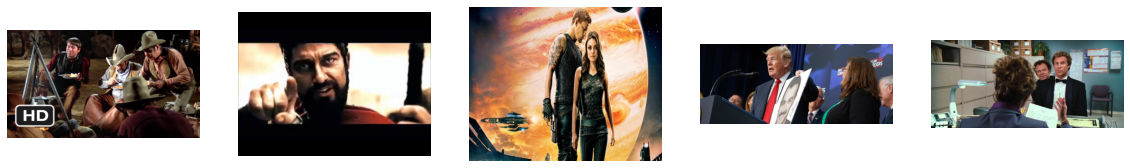

In [7]:
img_display(images_arr,5)

In [8]:
images = images_arr[:,0]
labels = images_arr[:,1]

##### For every image in images, labels hold a list of dictionaries holding information on the faces identified. I.e if an image contains 1 face, the corresponding labels list have only one dict. If the image has 5 faces, then the corresponding labels have a list of 5 dicts. Let us see through samples.

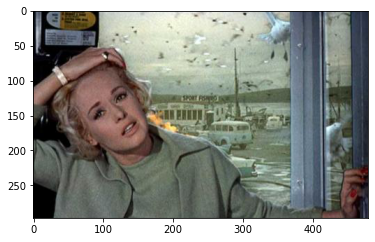

In [9]:
plt.imshow(images[207])

In [10]:
labels[207]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.03333333333333333, 'y': 0.2760942760942761},
   {'x': 0.41875, 'y': 0.797979797979798}],
  'imageWidth': 480,
  'imageHeight': 297}]

Image 207 has only one person and hence its corresponding labels hold a list of 1 dict.

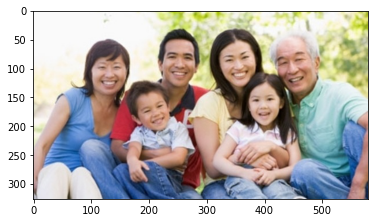

In [11]:
plt.imshow(images[4])

In [12]:
labels[4]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.5586206896551724, 'y': 0.19938650306748465},
   {'x': 0.6603448275862069, 'y': 0.3773006134969325}],
  'imageWidth': 580,
  'imageHeight': 326},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.38620689655172413, 'y': 0.18711656441717792},
   {'x': 0.4896551724137931, 'y': 0.4049079754601227}],
  'imageWidth': 580,
  'imageHeight': 326},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.1724137931034483, 'y': 0.23006134969325154},
   {'x': 0.2775862068965517, 'y': 0.44171779141104295}],
  'imageWidth': 580,
  'imageHeight': 326},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.7155172413793104, 'y': 0.19938650306748465},
   {'x': 0.8448275862068966, 'y': 0.41411042944785276}],
  'imageWidth': 580,
  'imageHeight': 326},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.2982758620689655, 'y': 0.44171779141104295},
   {'x': 0.4189655172413793, 'y': 0.6533742331288344}],
  'imageWidth': 580,
  'imageHe

image 4 contains 6 faces, hence corresponding labels is a list of 6 dicts with details of 6 faces (coordinates, width, height, etc)

In [13]:
# To unify the shape of all images, lets set the needed variables
img_width = 224
img_height = 224
alpha = 1

In [14]:
y = np.zeros((int(images_arr.shape[0]), img_height, img_width)) ## Initializing 
X = np.zeros((int(images_arr.shape[0]), img_height, img_width, 3))
for index in range(images_arr.shape[0]):
    image = images_arr[index][0]
    image = cv2.resize(image, dsize=(img_height, img_width), interpolation=cv2.INTER_CUBIC)
    try:
      image = image[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(image, dtype=np.float32))
    for i in images_arr[index][1]:
        x1 = int(i["points"][0]['x'] * img_width) ## identify the co-ordinates of the face to mask
        x2 = int(i["points"][1]['x'] * img_width) ## identify the co-ordinates of the face to mask
        y1 = int(i["points"][0]['y'] * img_height) ## identify the co-ordinates of the face to mask
        y2 = int(i["points"][1]['y'] * img_height) ## identify the co-ordinates of the face to mask
        y[index][y1:y2, x1:x2] = 1                ## mask the face area with 1

In [15]:
X.shape

(409, 224, 224, 3)

In [16]:
y.shape

(409, 224, 224)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


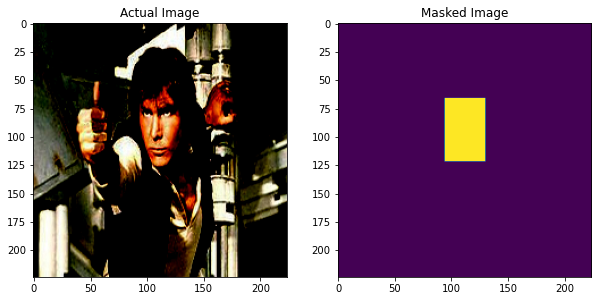

In [18]:
## lets see a sample X and its y
plt.figure(figsize=(10, 5))
n = np.random.randint(0, X.shape[0])
ax1 = plt.subplot(1,2,1)
ax1.set_title("Actual Image")
ax1.imshow(X[n])
ax2 = plt.subplot(1,2,2)
ax2.set_title("Masked Image")
ax2.imshow(y[n])



##### The area where the face is present in the image is identified correctly and masked with Yellow.

### C. Split the data into train and test[400:9]. [1 Marks]

In [19]:
# Take first 400 images as train and last 9 images as test
X_train = X[:400]
y_train = y[:400]
X_test = X[400:]
y_test = y[400:]

In [20]:
print("Shape of X_train :{}".format(X_train.shape))
print("Shape of y_train :{}".format(y_train.shape))
print("Shape of X_test  :{}".format(X_test.shape))
print("Shape of y_test  :{}".format(y_test.shape))

Shape of X_train :(400, 224, 224, 3)
Shape of y_train :(400, 224, 224)
Shape of X_test  :(9, 224, 224, 3)
Shape of y_test  :(9, 224, 224)


### D. Select random image from the train data and display original image and masked image. [2 Marks]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


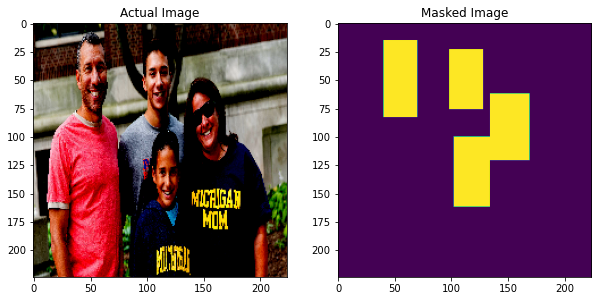

In [21]:
## lets see a sample image from train data and its masked image
plt.figure(figsize=(10, 5))
n = np.random.randint(0, X_train.shape[0])
ax1 = plt.subplot(1,2,1)
ax1.set_title("Actual Image")
ax1.imshow(X_train[n])
ax2 = plt.subplot(1,2,2)
ax2.set_title("Masked Image")
ax2.imshow(y_train[n])



All the faces in the above image are correctly identified and masked with yellow.

## 2. Model building [11 Marks]
### A. Design a face mask detection model. [4 Marks]
Hint: 1. Use MobileNet architecture for initial pre-trained non-trainable layers.
Hint: 2. Add appropriate Upsampling layers to imitate U-net architecture.

In [22]:
def create_fmd_model(trainable=True):
    cv_model = MobileNet(input_shape=(img_height, img_width, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in cv_model.layers:
        layer.trainable = trainable
  
    block0 = cv_model.get_layer("conv_pw_1_relu").output
    block1 = cv_model.get_layer("conv_pw_3_relu").output
    block2 = cv_model.get_layer("conv_pw_5_relu").output
    block3 = cv_model.get_layer("conv_pw_11_relu").output
    block4 = cv_model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block4), block3])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block2])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block1])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block0])
    print(x.shape)
    x = UpSampling2D()(x)
    print(x.shape)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((img_height, img_width))(x)
    print(x.shape)

    return Model(inputs=cv_model.input, outputs=x)

In [23]:
fmd_model = create_fmd_model()

(None, 14, 14, 1536)
(None, 28, 28, 1792)
(None, 56, 56, 1920)
(None, 112, 112, 1984)
(None, 224, 224, 1984)
(None, 224, 224)


In [24]:
fmd_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 112, 112, 32  128         ['conv1[0][0]']                  
                                )                                                             

 on)                                                                                              
                                                                                                  
 conv_dw_5_relu (ReLU)          (None, 28, 28, 256)  0           ['conv_dw_5_bn[0][0]']           
                                                                                                  
 conv_pw_5 (Conv2D)             (None, 28, 28, 256)  65536       ['conv_dw_5_relu[0][0]']         
                                                                                                  
 conv_pw_5_bn (BatchNormalizati  (None, 28, 28, 256)  1024       ['conv_pw_5[0][0]']              
 on)                                                                                              
                                                                                                  
 conv_pw_5_relu (ReLU)          (None, 28, 28, 256)  0           ['conv_pw_5_bn[0][0]']           
          

 conv_dw_11 (DepthwiseConv2D)   (None, 14, 14, 512)  4608        ['conv_pw_10_relu[0][0]']        
                                                                                                  
 conv_dw_11_bn (BatchNormalizat  (None, 14, 14, 512)  2048       ['conv_dw_11[0][0]']             
 ion)                                                                                             
                                                                                                  
 conv_dw_11_relu (ReLU)         (None, 14, 14, 512)  0           ['conv_dw_11_bn[0][0]']          
                                                                                                  
 conv_pw_11 (Conv2D)            (None, 14, 14, 512)  262144      ['conv_dw_11_relu[0][0]']        
                                                                                                  
 conv_pw_11_bn (BatchNormalizat  (None, 14, 14, 512)  2048       ['conv_pw_11[0][0]']             
 ion)     

### B. Design your own Dice Coefficient and Loss function. [2 Marks]

In [25]:
from tensorflow import reduce_sum
from tensorflow.keras.backend import epsilon

# Defining dice coefficient 
def dice_coefficient(y_true, y_pred):
    numerator = 2 * reduce_sum(y_true * y_pred)
    denominator = reduce_sum(y_true + y_pred)
    return numerator / (denominator + epsilon())

In [26]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log

# Defining loss function
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### C. Train and tune the model as required. [3 Marks]

In [27]:
fmd_model.compile(loss=loss, optimizer='adam', metrics=[dice_coefficient])

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min")
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

In [39]:
fmd_model_fit=fmd_model.fit(X_train, y_train, epochs=10, batch_size=1, callbacks=[checkpoint, reduce_lr, stop],validation_data=(X_test, y_test))

Epoch 1/10
400/400 [==============================] - ETA: 0s - loss: 0.4971 - dice_coefficient: 0.7527
Epoch 1: loss did not improve from 0.33218
400/400 [==============================] - 419s 1s/step - loss: 0.4971 - dice_coefficient: 0.7527 - val_loss: 0.9816 - val_dice_coefficient: 0.5362 - lr: 0.0010
Epoch 2/10
400/400 [==============================] - ETA: 0s - loss: 0.3748 - dice_coefficient: 0.8038
Epoch 2: loss did not improve from 0.33218
400/400 [==============================] - 407s 1s/step - loss: 0.3748 - dice_coefficient: 0.8038 - val_loss: 1.0087 - val_dice_coefficient: 0.5661 - lr: 0.0010
Epoch 3/10
400/400 [==============================] - ETA: 0s - loss: 0.3099 - dice_coefficient: 0.8342
Epoch 3: loss improved from 0.33218 to 0.30993, saving model to model-0.31.h5
400/400 [==============================] - 400s 1s/step - loss: 0.3099 - dice_coefficient: 0.8342 - val_loss: 0.9985 - val_dice_coefficient: 0.5793 - lr: 0.0010
Epoch 4/10
400/400 [=====================

### D. Evaluate and share insights on performance of the model. [2 Marks]

In [40]:
fmd_model_results = fmd_model.evaluate(X_test, y_test)

1/1 [==============================] - 6s 6s/step - loss: 0.9856 - dice_coefficient: 0.5735


In [41]:
print('Test loss: ', fmd_model_results[0])
print('Test dice coefficient: ', fmd_model_results[1])

Test loss:  0.9856072664260864
Test dice coefficient:  0.5735422372817993


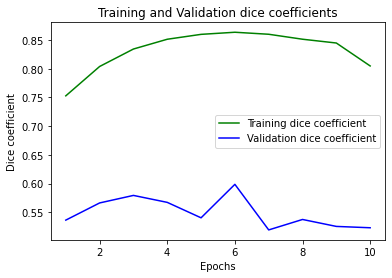

In [42]:
EPOCH=10
dice_coeff_train = fmd_model_fit.history['dice_coefficient']
dice_coeff_val = fmd_model_fit.history['val_dice_coefficient']
epochs = range(1,EPOCH+1)
plt.plot(epochs, dice_coeff_train, 'g', label='Training dice coefficient')
plt.plot(epochs, dice_coeff_val, 'b', label='Validation dice coefficient')
plt.title('Training and Validation dice coefficients')
plt.xlabel('Epochs')
plt.ylabel('Dice coefficient')
plt.legend()
plt.show()

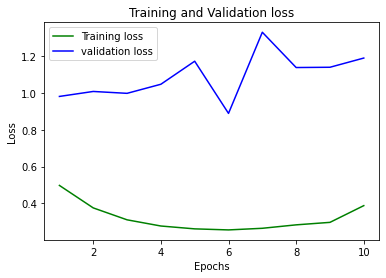

In [43]:
EPOCH=10
loss_train = fmd_model_fit.history['loss']
loss_val = fmd_model_fit.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Insights:
- The dice coefficient seems to fluctuate in the beginning, but at the end seems the fluctuations have decreased.


## 3. Test the model predictions on the test image: ‘image with index 3 in the test data’ and visualise the predicted masks on the faces in the image. [2 Marks]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


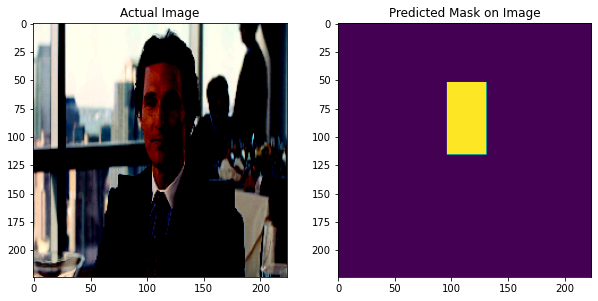

In [44]:
# Setting index as 3 and showing the image
idx=3
plt.figure(figsize=(10, 5))

ax1 = plt.subplot(1,2,1)
ax1.set_title("Actual Image")
ax1.imshow(X_test[idx])
ax2 = plt.subplot(1,2,2)
ax2.set_title("Predicted Mask on Image")
ax2.imshow(y_test[idx])


In [45]:
pred_mask = cv2.resize(1.0 * (fmd_model.predict(x=np.array([X_test[idx]]))[0] > 0.5), (img_width, img_height)) 

1/1 [==============================] - 1s 1s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


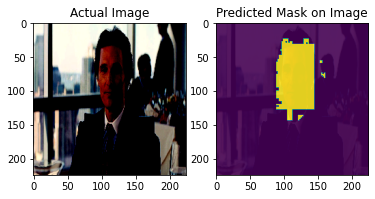

In [46]:

ax1 = plt.subplot(1,2,1)
ax1.set_title("Actual Image")
ax1.imshow(X_test[idx])
ax2 = plt.subplot(1,2,2)
ax2.set_title("Predicted Mask on Image")
ax2.imshow(X_test[idx])
ax2.imshow(pred_mask, alpha=0.9)

#plt.imshow(X_test[idx])
#plt.imshow(pred_mask, alpha=0.9)

#### Insights: As shown in the baove images, the model has correctly masked the face on the actual image.

# PART B
## 1. Read/import images from folder ‘training_images’. [2 Marks]

In [47]:
data_folder = 'training_images'
images_list = []

print("Extracting images from training_images folder...")
for img in os.listdir(data_folder):
    image = cv2.imread(os.path.join(data_folder,img)) 
    images_list.append(image)

print("Number of images read : {}".format(len(images_list)))

Extracting images from training_images folder...
Number of images read : 1091


## 2. Write a loop which will iterate through all the images in the ‘training_images’ folder and detect the faces present on all the images. [3 Marks]
Hint: You can use ’haarcascade_frontalface_default.xml’ from internet to detect faces which is available open source

In [48]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'/haarcascade_frontalface_default.xml')
img_df_list=[]
for image in images_list:
    img_df_dict={}
    img_df_dict['orig_img']=image
    temp_image=image.copy()
    gray = cv2.cvtColor(temp_image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.0485258, 6)
    for (x, y, w, h) in faces:
        x1 = x
        x2 = x+w
        y1 = y
        y2 = y+h
        cv2.rectangle(temp_image, (x1,y1), (x2,y2), (255,0,0), 4)    
    img_df_dict['detected_image']=temp_image
    img_df_list.append(img_df_dict)

In [49]:
def show_images(lst,n):
    rand = np.random.randint(0, len(lst), n) # Generating n random numbers from total number of images
    print("Showing images with index in : {}".format(rand))
    plt.figure(figsize=(10, 20))
    for cnt,j in enumerate(rand):
        plt.subplot(n, 2, (cnt*2)+1)
        plt.imshow(lst[j]['orig_img'])
        plt.subplot(n, 2, (cnt*2)+2)
        plt.imshow(lst[j]['detected_image'])


Showing images with index in : [ 88  78 733 829 816]


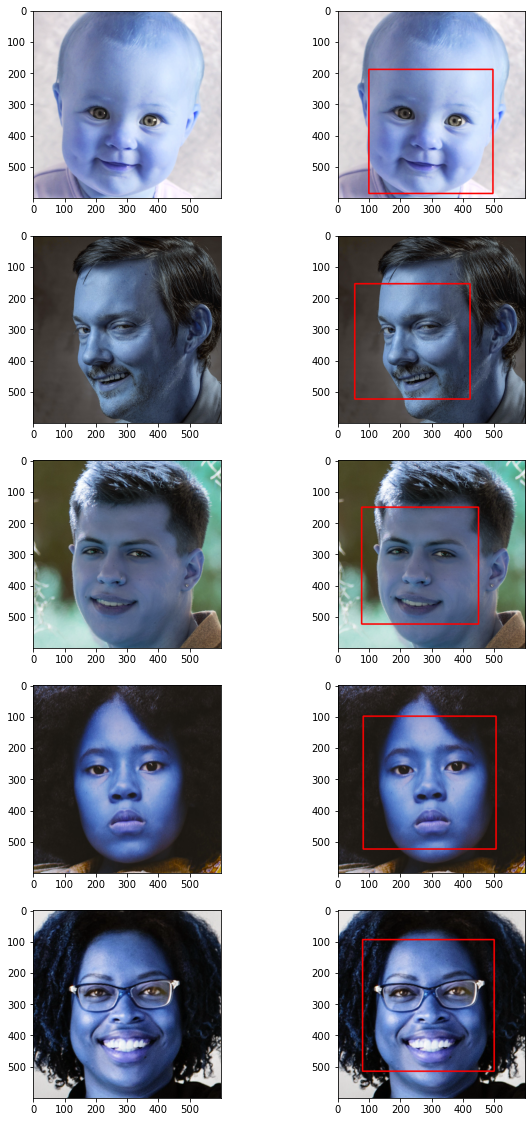

In [51]:
show_images(img_df_list,5)

## 3. From the same loop above, extract metadata of the faces and write into a DataFrame. [3 Marks]

In [52]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'/haarcascade_frontalface_default.xml')
img_df_list=[]
for image in images_list:
    img_df_dict={}
    img_df_dict['orig_img']=image
    temp_image=image.copy()
    gray = cv2.cvtColor(temp_image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.0485258, 6)
    img_df_dict['metadata'] = []
    for (x, y, w, h) in faces:
        x1 = x
        x2 = x+w
        y1 = y
        y2 = y+h
        point_dict={}
        point_dict['x']=x
        point_dict['y']=y
        point_dict['w']=w
        point_dict['h']=h
        point_dict['coord1']={x1,y1}
        point_dict['coord2']={x2,y2}
                
        img_df_dict['metadata'].append(point_dict)
        cv2.rectangle(temp_image, (x1,y1), (x2,y2), (255,0,0), 4)    
    img_df_dict['detected_image']=temp_image
    img_df_list.append(img_df_dict)

In [53]:
img_df_list[:3]

[{'orig_img': array([[[ 93, 186, 201],
          [ 89, 182, 197],
          [ 82, 177, 192],
          ...,
          [139, 156, 213],
          [136, 153, 210],
          [139, 158, 215]],
  
         [[ 79, 172, 187],
          [ 78, 173, 188],
          [ 79, 174, 189],
          ...,
          [138, 154, 213],
          [134, 150, 209],
          [137, 153, 212]],
  
         [[ 62, 157, 172],
          [ 67, 162, 177],
          [ 74, 171, 185],
          ...,
          [132, 146, 205],
          [127, 143, 202],
          [131, 147, 206]],
  
         ...,
  
         [[107,  75,  99],
          [111,  79, 103],
          [117,  86, 107],
          ...,
          [ 32,  21,  23],
          [ 31,  22,  25],
          [ 32,  23,  26]],
  
         [[105,  76,  99],
          [109,  80, 103],
          [114,  85, 108],
          ...,
          [ 31,  20,  22],
          [ 31,  22,  25],
          [ 33,  24,  27]],
  
         [[109,  80, 103],
          [114,  85, 108],
          [1

In [54]:
# Writing to pandas dataframe
img_df=pd.DataFrame(img_df_list)
img_df.shape

(1091, 3)

In [55]:
img_df.head()

orig_img  \
0  [[[93, 186, 201], [89, 182, 197], [82, 177, 19...   
1  [[[255, 255, 255], [255, 255, 255], [255, 255,...   
2  [[[35, 39, 34], [37, 41, 36], [35, 39, 34], [3...   
3  [[[142, 137, 158], [154, 150, 169], [163, 159,...   
4  [[[154, 159, 157], [153, 158, 156], [156, 161,...   

                                            metadata  \
0  [{'x': 146, 'y': 139, 'w': 428, 'h': 428, 'coo...   
1  [{'x': 80, 'y': 139, 'w': 435, 'h': 435, 'coor...   
2  [{'x': 32, 'y': 116, 'w': 367, 'h': 367, 'coor...   
3  [{'x': 129, 'y': 166, 'w': 365, 'h': 365, 'coo...   
4  [{'x': 47, 'y': 191, 'w': 352, 'h': 352, 'coor...   

                                      detected_image  
0  [[[93, 186, 201], [89, 182, 197], [82, 177, 19...  
1  [[[255, 255, 255], [255, 255, 255], [255, 255,...  
2  [[[35, 39, 34], [37, 41, 36], [35, 39, 34], [3...  
3  [[[142, 137, 158], [154, 150, 169], [163, 159,...  
4  [[[154, 159, 157], [153, 158, 156], [156, 161,...

In [56]:
img_df['metadata'].head(2)

0    [{'x': 146, 'y': 139, 'w': 428, 'h': 428, 'coo...
1    [{'x': 80, 'y': 139, 'w': 435, 'h': 435, 'coor...
Name: metadata, dtype: object

In [57]:
# Function to show images from dataframe
def show_images_df(df,n):
    orig_img_list = df['orig_img'][:]
    detected_image_list = df['detected_image'][:]
    rand = np.random.randint(0, len(orig_img_list), n) # Generating n random numbers from total number of images
    print("Showing images with index in : {}".format(rand))
    plt.figure(figsize=(10, 20))
    for cnt,j in enumerate(rand):
        plt.subplot(n, 2, (cnt*2)+1)
        plt.imshow(orig_img_list[j])
        plt.subplot(n, 2, (cnt*2)+2)
        plt.imshow(detected_image_list[j])

Showing images with index in : [ 566  638 1001 1068  203]


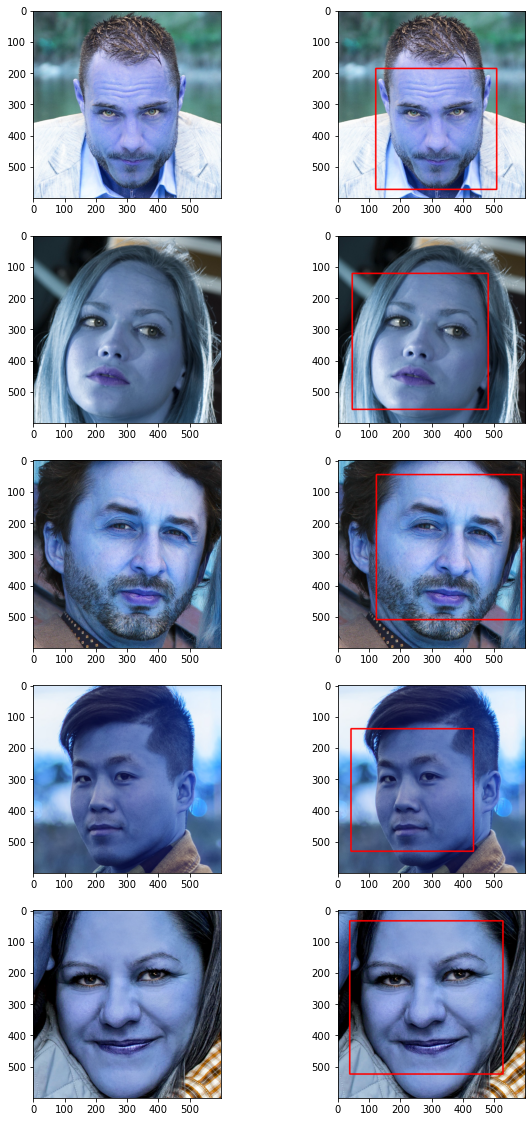

In [59]:
show_images_df(img_df,5)

## 4. Save the output Dataframe in .csv format. [2 Marks]

In [60]:
# Saving dataframe to .csv file
img_df.to_csv('face_detection_out.csv',index=False)

In [61]:
# Checking if we are able to read the saved .csv file
read_df=pd.read_csv('face_detection_out.csv')
read_df.shape

(1091, 3)

# PART C
## 1. Unzip, read and Load data(‘PINS.zip’) into session. [2 Marks]

In [62]:
from zipfile import ZipFile
zip_path='PINS.zip'
with ZipFile(zip_path, 'r') as z:
  z.extractall()


## 2. Write function to create metadata of the image. [4 Marks]
Hint: Metadata means derived information from the available data which can be useful for particular problem statement.

In [63]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    

In [64]:
def get_file_metadata(path, folder, file):
    # Check file extension. Allow only jpg/jpeg' files.
    ext = os.path.splitext(file)[1]
    if ext == '.jpg' or ext == '.jpeg':
        # getting path of every valid file 
        full_path=IdentityMetadata(path, folder, file)
    return full_path

In [65]:
# Checking if the function works 
get_file_metadata('PINS','pins_Aaron Paul','Aaron Paul0_262.jpg')

PINS\pins_Aaron Paul\Aaron Paul0_262.jpg

## 3. Write a loop to iterate through each and every image and create metadata for all the images. [4 Marks]

In [66]:
def load_metadata(path):
    metadata = []
    for folder in os.listdir(path):
        for file in os.listdir(os.path.join(path, folder)):
            full_path=get_file_metadata(path, folder, file)
            metadata.append(full_path)
    return np.array(metadata)

In [67]:
# Loading all images
pins_metadata = load_metadata('PINS')

In [68]:
pins_metadata.shape

(10770,)

In [69]:
# Checking a random image
pins_metadata[20]

PINS\pins_Aaron Paul\Aaron Paul140_243.jpg

In [70]:
pins_metadata[20].image_path()

'PINS\\pins_Aaron Paul\\Aaron Paul140_243.jpg'

## 4. Generate Embeddings vectors on the each face in the dataset. [4 Marks]
Hint: Use ‘vgg_face_weights.h5’

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [72]:
vgg_face_model = vgg_face()

In [73]:
# Loading the weights given
vgg_face_model.load_weights('vgg_face_weights.h5')

In [74]:
print('Input of vgg_face_model  : {}'.format(vgg_face_model.inputs))
print('\nOutput of vgg_face_model : {}'.format(vgg_face_model.outputs))
print("---------------------------------")
print('Input of first layer     : {}'.format(vgg_face_model.layers[0].input))
print('\nOutput of first layer    : {}'.format(vgg_face_model.layers[0].output))
print("---------------------------------")
print('Input of last but previous layer : {}'.format(vgg_face_model.layers[-2].input))
print('\nOutput of last but previous layer: {}'.format(vgg_face_model.layers[-2].output))

Input of vgg_face_model  : [<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'zero_padding2d_input')>]

Output of vgg_face_model : [<KerasTensor: shape=(None, 2622) dtype=float32 (created by layer 'activation')>]
---------------------------------
Input of first layer     : KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='zero_padding2d_input'), name='zero_padding2d_input', description="created by layer 'zero_padding2d_input'")

Output of first layer    : KerasTensor(type_spec=TensorSpec(shape=(None, 226, 226, 3), dtype=tf.float32, name=None), name='zero_padding2d/Pad:0', description="created by layer 'zero_padding2d'")
---------------------------------
Input of last but previous layer : KerasTensor(type_spec=TensorSpec(shape=(None, 1, 1, 2622), dtype=tf.float32, name=None), name='conv2d_16/BiasAdd:0', description="created by layer 'conv2d_16'")

Output of last but previous layer: KerasTensor(type_spec=TensorSpec(shape=(None, 262

In [75]:
vgg_face_descriptor = Model(inputs=vgg_face_model.layers[0].input, outputs=vgg_face_model.layers[-2].output)

In [76]:
vgg_face_descriptor.inputs, vgg_face_descriptor.outputs

([<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'zero_padding2d_input')>],
 [<KerasTensor: shape=(None, 2622) dtype=float32 (created by layer 'flatten')>])

In [77]:
# Define function to load the image, reverse the image to RGB, normalize and resize 
def load_normalize_image(path):
    img = cv2.imread(path, 1)
    
    # reverse to RGB
    img_upd =img[...,::-1]
    
    # Normalising pixel values
    img_upd = (img_upd / 255.).astype(np.float32)
    
    #resizing to (224,224)
    img_upd = cv2.resize(img_upd, dsize = (224,224))
    
    return img_upd

In [78]:
# Test if the function works for a sample image
load_normalize_image(pins_metadata[0].image_path())

array([[[0.91207695, 0.7356064 , 0.6454103 ],
        [0.88488847, 0.7143265 , 0.62609994],
        [0.8638735 , 0.6964493 , 0.6183299 ],
        ...,
        [0.4222514 , 0.24705882, 0.27578783],
        [0.41568628, 0.24705882, 0.28235295],
        [0.41568628, 0.24705882, 0.28235295]],

       [[0.90540075, 0.73095226, 0.6367121 ],
        [0.86887133, 0.69931585, 0.60704523],
        [0.83423114, 0.66952527, 0.5825918 ],
        ...,
        [0.4222514 , 0.24705882, 0.27578783],
        [0.41568628, 0.24705882, 0.28235295],
        [0.41568628, 0.24705882, 0.28235295]],

       [[0.8978419 , 0.72529286, 0.62725365],
        [0.85586554, 0.68387043, 0.5861082 ],
        [0.80574644, 0.6399422 , 0.5461987 ],
        ...,
        [0.4188813 , 0.24368873, 0.27241772],
        [0.41231617, 0.24368873, 0.27898285],
        [0.4151221 , 0.24649464, 0.28178877]],

       ...,

       [[0.76963806, 0.46629983, 0.36387992],
        [0.76523983, 0.46524858, 0.3672269 ],
        [0.7585149 , 0

In [79]:
# Get the embedding vector for this sample image
samp_img = load_normalize_image(pins_metadata[0].image_path())
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(samp_img, axis=0))[0]
print("Shape of the embedding vector : {}".format(embedding_vector.shape))

1/1 [==============================] - 2s 2s/step
Shape of the embedding vector : (2622,)


In [80]:
## Let us check the sample values of embedded vectors generated for the sample image
for i in range(5):
    print(i, embedding_vector[i], type(embedding_vector[i]))

0 0.03170304 <class 'numpy.float32'>
1 -0.015051306 <class 'numpy.float32'>
2 -0.012434014 <class 'numpy.float32'>
3 0.01952115 <class 'numpy.float32'>
4 -0.00044385204 <class 'numpy.float32'>


In [81]:
## function to loop through all images and get the embedding vectors for all images
def get_all_embeddings(metadata):
    embeddings = np.zeros((metadata.shape[0], 2622)) # initializing for all 10770 images
    for i, m in enumerate(metadata):
        img_upd = load_normalize_image(metadata[i].image_path())
        embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img_upd, axis=0))[0]
        embeddings[i]=embedding_vector
    return embeddings 

In [82]:
## calling the function for pins_metadata
all_embeddings=get_all_embeddings(pins_metadata)
print("Shape of all_embedding : {}".format(all_embeddings.shape))

1/1 [==============================] - 0s 372ms/step


1/1 [==============================] - 0s 409ms/step


1/1 [==============================] - 0s 387ms/step


1/1 [==============================] - 0s 390ms/step


1/1 [==============================] - 0s 384ms/step


1/1 [==============================] - 0s 411ms/step


1/1 [==============================] - 0s 403ms/step


1/1 [==============================] - 0s 379ms/step


1/1 [==============================] - 0s 350ms/step


1/1 [==============================] - 0s 393ms/step


1/1 [==============================] - 0s 363ms/step


1/1 [==============================] - 0s 432ms/step


1/1 [==============================] - 1s 565ms/step


1/1 [==============================] - 0s 403ms/step


1/1 [==============================] - 0s 418ms/step


1/1 [==============================] - 1s 763ms/step


1/1 [==============================] - 1s 552ms/step


1/1 [==============================] - 1s 581ms/step


1/1 [==============================] - 1s 609ms/step


1/1 [==============================] - 1s 595ms/step


1/1 [==============================] - 1s 613ms/step


1/1 [==============================] - 1s 632ms/step


1/1 [==============================] - 1s 757ms/step


1/1 [==============================] - 1s 625ms/step


1/1 [==============================] - 1s 617ms/step


1/1 [==============================] - 1s 613ms/step


1/1 [==============================] - 1s 629ms/step


1/1 [==============================] - 1s 592ms/step


1/1 [==============================] - 1s 585ms/step


1/1 [==============================] - 1s 796ms/step


1/1 [==============================] - 1s 692ms/step


1/1 [==============================] - 1s 608ms/step


1/1 [==============================] - 1s 573ms/step


1/1 [==============================] - 1s 590ms/step


1/1 [==============================] - 1s 589ms/step


1/1 [==============================] - 1s 640ms/step


1/1 [==============================] - 1s 557ms/step


1/1 [==============================] - 1s 589ms/step


1/1 [==============================] - 1s 588ms/step


1/1 [==============================] - 1s 763ms/step


1/1 [==============================] - 0s 481ms/step


1/1 [==============================] - 0s 389ms/step


1/1 [==============================] - 0s 381ms/step


1/1 [==============================] - 0s 349ms/step


1/1 [==============================] - 0s 370ms/step


1/1 [==============================] - 0s 344ms/step


1/1 [==============================] - 0s 353ms/step


1/1 [==============================] - 0s 428ms/step


1/1 [==============================] - 0s 416ms/step


1/1 [==============================] - 0s 350ms/step


1/1 [==============================] - 0s 347ms/step


1/1 [==============================] - 0s 339ms/step


1/1 [==============================] - 0s 450ms/step


1/1 [==============================] - 0s 354ms/step


1/1 [==============================] - 0s 387ms/step


1/1 [==============================] - 0s 390ms/step


1/1 [==============================] - 0s 361ms/step


1/1 [==============================] - 0s 397ms/step


1/1 [==============================] - 0s 349ms/step


1/1 [==============================] - 0s 349ms/step


1/1 [==============================] - 0s 348ms/step


1/1 [==============================] - 0s 347ms/step


1/1 [==============================] - 0s 346ms/step


1/1 [==============================] - 0s 342ms/step


1/1 [==============================] - 0s 348ms/step


1/1 [==============================] - 0s 350ms/step


1/1 [==============================] - 0s 341ms/step


1/1 [==============================] - 0s 362ms/step


1/1 [==============================] - 0s 423ms/step


1/1 [==============================] - 0s 317ms/step
Shape of all_embedding : (10770, 2622)


In [83]:
## Let us check the sample values of embedded vectors generated for the sample image
for i in range(3):
    for j in range(5):
        print(i, all_embeddings[i].shape, all_embeddings[i][j])

0 (2622,) 0.03170304000377655
0 (2622,) -0.01505130622535944
0 (2622,) -0.012434014119207859
0 (2622,) 0.01952115073800087
0 (2622,) -0.0004438520409166813
1 (2622,) 0.034977030009031296
1 (2622,) -0.001050618477165699
1 (2622,) -0.012489347718656063
1 (2622,) 0.025949543341994286
1 (2622,) 0.025733577087521553
2 (2622,) 0.028018906712532043
2 (2622,) -0.0011262879706919193
2 (2622,) -0.012657475657761097
2 (2622,) 0.029612626880407333
2 (2622,) 0.03246227651834488


## 5. Build distance metrics for identifying the distance between two similar and dissimilar images. [4 Marks]

In [86]:
# Function to caluclate the distance between 2 embeddings
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

In [87]:
# FUnction to show distance metrics between 2 given images
def show_pair(idx1, idx2):
    plt.figure(figsize=(15,5))
    path1=pins_metadata[idx1].image_path()
    path2=pins_metadata[idx2].image_path()
    dist=distance(all_embeddings[idx1], all_embeddings[idx2])
    plt.suptitle("Distance between images {0} & {1} = {2} \n".format(idx1, idx2, dist))

    ax1 = plt.subplot(1,2,1)
    ax1.set_title(path1)
    ax1.imshow(load_normalize_image(pins_metadata[idx1].image_path()))
    ax2 = plt.subplot(1,2,2)
    ax2.set_title(path2)
    ax2.imshow(load_normalize_image(pins_metadata[idx2].image_path()))
    

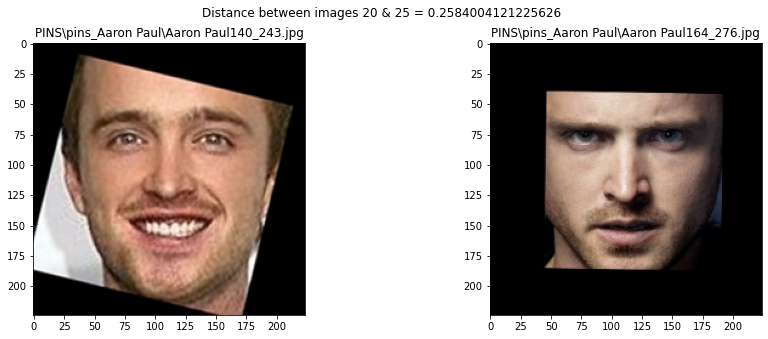

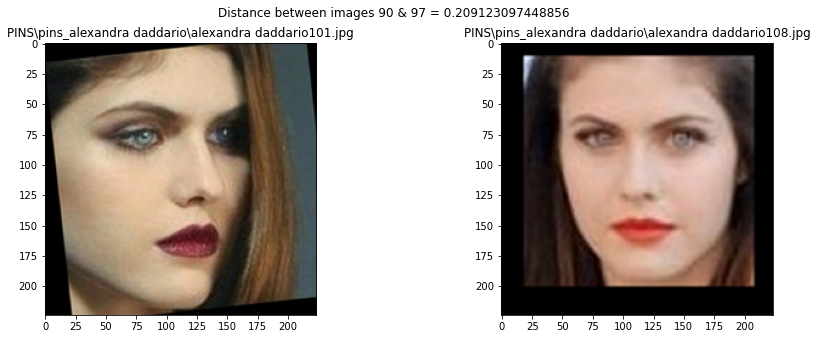

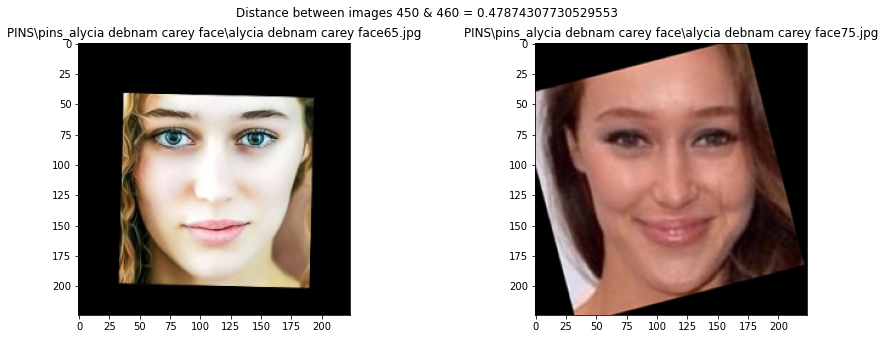

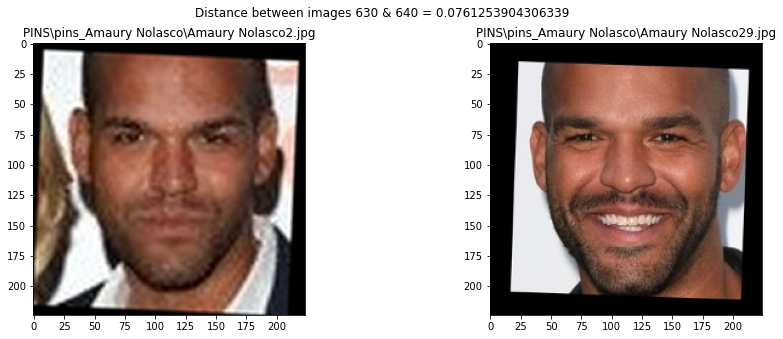

In [88]:
## Example of similar images
show_pair(20, 25)
show_pair(90, 97)
show_pair(450,460)
show_pair(630,640)

##### As shown above, the pair of images belong to same person and distance calculated is closer to 0

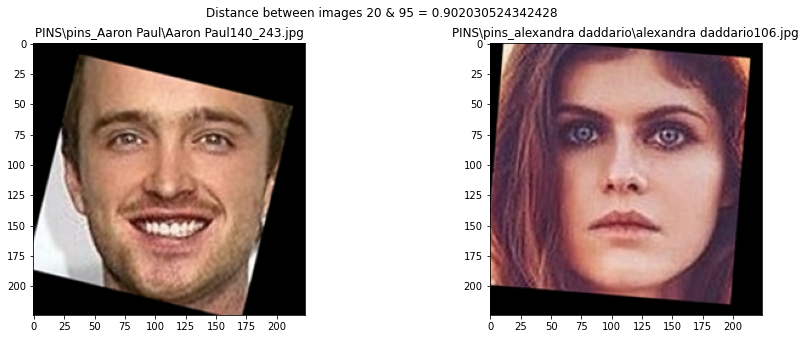

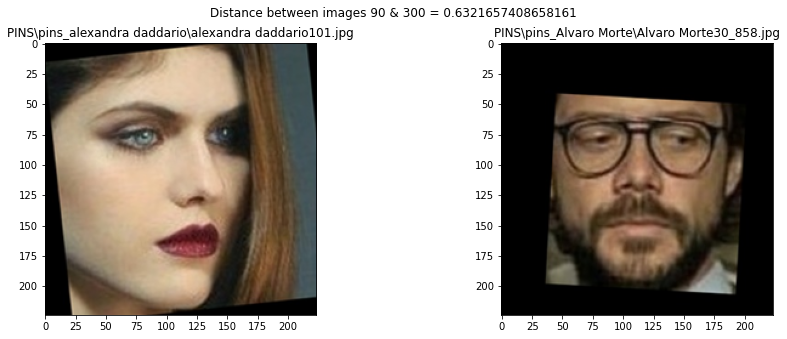

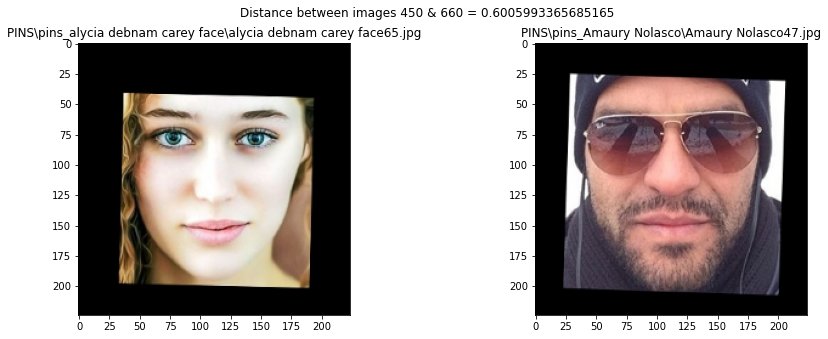

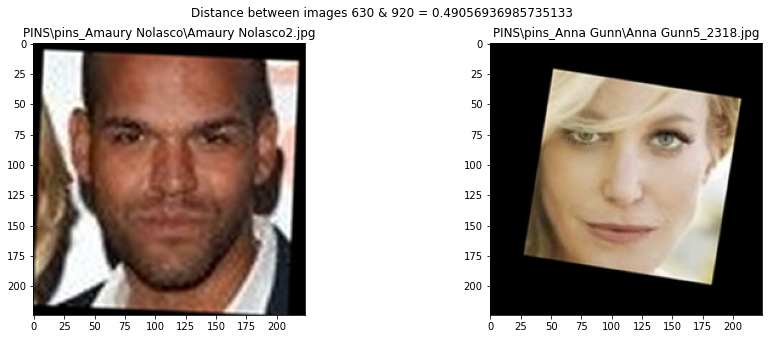

In [89]:
## Example of dissimilar images
show_pair(20, 95)
show_pair(90, 300)
show_pair(450,660)
show_pair(630,920)

##### As shown above, the pair of images belong to different person and distance calculated is closer to 1

## 6. Use PCA for dimensionality reduction. [2 Marks]

In [90]:
X=all_embeddings
y_arr=np.array([m.name for m in pins_metadata])
print("Shape of X :{}".format(X.shape))
print("Shape of y_arr :{}".format(y_arr.shape))

Shape of X :(10770, 2622)
Shape of y_arr :(10770,)


In [91]:
X

array([[ 0.03170304, -0.01505131, -0.01243401, ...,  0.0004314 ,
         0.00219081, -0.00908097],
       [ 0.03497703, -0.00105062, -0.01248935, ..., -0.01053091,
         0.00179321,  0.02439156],
       [ 0.02801891, -0.00112629, -0.01265748, ..., -0.00904751,
        -0.00578401,  0.02125831],
       ...,
       [ 0.00965871,  0.0037216 , -0.01345864, ..., -0.01433404,
         0.01899944,  0.03899154],
       [ 0.00230929,  0.00094763, -0.00544813, ..., -0.01600494,
         0.01053975,  0.03683249],
       [ 0.01772301,  0.01064051,  0.01995193, ..., -0.0261843 ,
         0.03288927,  0.04882649]])

In [92]:
y_arr

array(['pins_Aaron Paul', 'pins_Aaron Paul', 'pins_Aaron Paul', ...,
       'pins_zendaya', 'pins_zendaya', 'pins_zendaya'], dtype='<U29')

In [93]:
labels = preprocessing.LabelEncoder()
y = labels.fit_transform(y_arr)
print(labels.classes_)

['pins_Aaron Paul' 'pins_Alvaro Morte' 'pins_Amanda Crew'
 'pins_Amaury Nolasco' 'pins_Anna Gunn' 'pins_Benedict Cumberbatch'
 'pins_Betsy Brandt' 'pins_Brenton Thwaites' 'pins_Brit Marling'
 'pins_Bryan Cranston' 'pins_Caity Lotz' 'pins_Cameron Monaghan'
 'pins_Chance Perdomo' 'pins_Chris Evans' 'pins_Chris Pratt'
 'pins_Cobie Smulders' 'pins_Danielle Panabaker' 'pins_Dave Franco'
 'pins_Dominic Purcell' 'pins_Dwayne Johnson' 'pins_Emilia Clarke'
 'pins_Emily Bett Rickards' 'pins_Emma Stone' 'pins_Gwyneth Paltrow'
 'pins_Henry Cavil' 'pins_Jason Momoa' 'pins_Jeremy Renner'
 'pins_Jesse Eisenberg' 'pins_Jim Parsons' 'pins_Jon Bernthal'
 'pins_Josh Radnor' 'pins_Kit Harington' 'pins_Krysten Ritter'
 'pins_Kumail Nanjiani' 'pins_Maisie Williams' 'pins_Mark Ruffalo'
 'pins_Martin Starr' 'pins_Melissa benoit' 'pins_Mike Colter'
 'pins_Morena Baccarin' 'pins_Morgan Freeman' 'pins_Natalie Portman'
 'pins_Neil Patrick Harris' 'pins_Paul Rudd' 'pins_Pedro Alonso'
 'pins_Peter Dinklage' 'pins_R

In [94]:
y.shape

(10770,)

In [95]:
y

array([ 0,  0,  0, ..., 99, 99, 99], dtype=int64)

In [96]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10, stratify=y)

train_idx = np.array([n for n in np.arange(pins_metadata.shape[0]) if n % 9 != 0])
test_idx = np.array([n for n in np.arange(pins_metadata.shape[0]) if n % 9 == 0])
print("Indexes in train_idx :{}".format(train_idx))
print("Indexes in test_idx  :{}".format(test_idx))


X_train = all_embeddings[train_idx]
X_test = all_embeddings[test_idx]
y_train = y[train_idx]
y_test = y[test_idx]

Indexes in train_idx :[    1     2     3 ... 10767 10768 10769]
Indexes in test_idx  :[    0     9    18 ... 10746 10755 10764]


In [97]:
print("Shape of X_train :{}".format(X_train.shape))
print("Shape of X_test :{}".format(X_test.shape))
print("Shape of y_train :{}".format(y_train.shape))
print("Shape of y_test :{}".format(y_test.shape))

Shape of X_train :(9573, 2622)
Shape of X_test :(1197, 2622)
Shape of y_train :(9573,)
Shape of y_test :(1197,)


In [98]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [99]:
print('Shape of X_train_std shape : {}'.format(X_train_std.shape))
print('Shape of X_test_std shape  : {}'.format(X_test_std.shape))
print("Shape of y_train :{}".format(y_train.shape))
print("Shape of y_test :{}".format(y_test.shape))

Shape of X_train_std shape : (9573, 2622)
Shape of X_test_std shape  : (1197, 2622)
Shape of y_train :(9573,)
Shape of y_test :(1197,)


In [100]:
# Applying PCA
pca = PCA(n_components=224)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [101]:
print("After applying PCA for dimensionality reduction..")
print("Shape of X_train_pca shape : {}".format(X_train_pca.shape))
print("Shape of X_test_pca shape  : {}".format(X_test_pca.shape))
print("Shape of y_train :{}".format(y_train.shape))
print("Shape of y_test :{}".format(y_test.shape))

After applying PCA for dimensionality reduction..
Shape of X_train_pca shape : (9573, 224)
Shape of X_test_pca shape  : (1197, 224)
Shape of y_train :(9573,)
Shape of y_test :(1197,)


## 7. Build an SVM classifier in order to map each image to its right person. [4 Marks]

In [102]:
clf = SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, gamma=0.001)

In [103]:
predicted_labels_train = clf.predict(X_train_pca)

In [104]:
predicted_labels_test = clf.predict(X_test_pca)

In [105]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x]==predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [106]:
train_accuracy=getAccuracy(y_train.tolist(),predicted_labels_train)
print("Train score accuracy using SVM: {}".format(train_accuracy))

Train score accuracy using SVM: 99.97910790765695


In [107]:
test_accuracy=getAccuracy(y_test.tolist(),predicted_labels_test)
print("Test score accuracy using SVM: {}".format(test_accuracy))

Test score accuracy using SVM: 94.56975772765246


In [108]:
#sample actual Vs Predicted
y_grid = (np.column_stack([y_test, predicted_labels_test]))
print(y_grid[0:20])
print(y_grid[50:55])
print(y_grid[1000:1005])

[[ 0  0]
 [ 0  0]
 [ 0  0]
 [ 0  0]
 [ 0  0]
 [ 0  0]
 [ 0  0]
 [ 0  0]
 [ 0  0]
 [ 0  0]
 [63 63]
 [63 63]
 [63 63]
 [63 61]
 [63 63]
 [63 63]
 [63 63]
 [63 63]
 [63 63]
 [63 63]]
[[64 64]
 [64 64]
 [64 64]
 [64 64]
 [ 2  2]]
[[52 52]
 [52 52]
 [52 52]
 [52 52]
 [52 52]]


As we can see above the test classes and predicted classes are same for the samples.

In [109]:
y_predict_encoded = labels.inverse_transform(predicted_labels_test)

print(y_predict_encoded)

['pins_Aaron Paul' 'pins_Aaron Paul' 'pins_Aaron Paul' ... 'pins_zendaya'
 'pins_zendaya' 'pins_zendaya']


In [110]:
class_dict={i: l for (i, l) in enumerate(labels.classes_)}
print('\nClass dictionary   : \n{}'.format(class_dict))


Class dictionary   : 
{0: 'pins_Aaron Paul', 1: 'pins_Alvaro Morte', 2: 'pins_Amanda Crew', 3: 'pins_Amaury Nolasco', 4: 'pins_Anna Gunn', 5: 'pins_Benedict Cumberbatch', 6: 'pins_Betsy Brandt', 7: 'pins_Brenton Thwaites', 8: 'pins_Brit Marling', 9: 'pins_Bryan Cranston', 10: 'pins_Caity Lotz', 11: 'pins_Cameron Monaghan', 12: 'pins_Chance Perdomo', 13: 'pins_Chris Evans', 14: 'pins_Chris Pratt', 15: 'pins_Cobie Smulders', 16: 'pins_Danielle Panabaker', 17: 'pins_Dave Franco', 18: 'pins_Dominic Purcell', 19: 'pins_Dwayne Johnson', 20: 'pins_Emilia Clarke', 21: 'pins_Emily Bett Rickards', 22: 'pins_Emma Stone', 23: 'pins_Gwyneth Paltrow', 24: 'pins_Henry Cavil', 25: 'pins_Jason Momoa', 26: 'pins_Jeremy Renner', 27: 'pins_Jesse Eisenberg', 28: 'pins_Jim Parsons', 29: 'pins_Jon Bernthal', 30: 'pins_Josh Radnor', 31: 'pins_Kit Harington', 32: 'pins_Krysten Ritter', 33: 'pins_Kumail Nanjiani', 34: 'pins_Maisie Williams', 35: 'pins_Mark Ruffalo', 36: 'pins_Martin Starr', 37: 'pins_Melissa b

Actual index of the image :630
Predicted class :3


Text(0.5, 1.0, 'Sample image below is identified as pins_Amaury Nolasco')

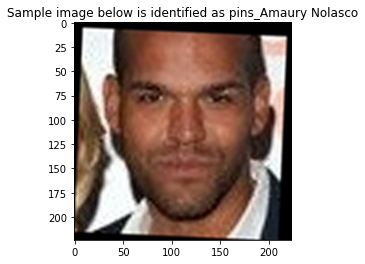

In [111]:
samp_idx = 70
print("Actual index of the image :{}".format(test_idx[samp_idx]))

samp_img = load_normalize_image(pins_metadata[test_idx][samp_idx].image_path())
samp_pred = predicted_labels_test[samp_idx]
print("Predicted class :{}".format(samp_pred))

samp_id =  class_dict[samp_pred]

plt.imshow(samp_img)
plt.title("Sample image below is identified as {}".format(samp_id))

## 8. Import and display the the test images. [2 Marks]
Hint: ‘Benedict Cumberbatch9.jpg’ and ‘Dwayne Johnson4.jpg’ are the test images.

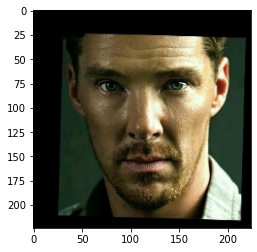

In [112]:
benedict_pic='Benedict Cumberbatch9.jpg'
benedict_img = load_normalize_image(benedict_pic)
plt.imshow(benedict_img)

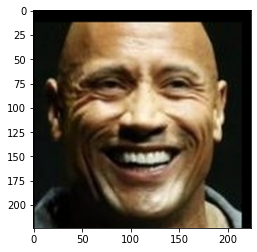

In [113]:
dwayne_pic='Dwayne Johnson4.jpg'
dwayne_img = load_normalize_image(dwayne_pic)
plt.imshow(dwayne_img)

## 9. Use the trained SVM model to predict the face on both test images. [4 Marks

In [114]:
def predict_sample(path):
    # reading the image
    samp_img = load_normalize_image(path)
    
    #Preparing embedded vector and model input 
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(samp_img, axis=0))[0]
    samp_embeddings = np.zeros((1, 2622)) # initializing for the image
    samp_embeddings[0]=embedding_vector
    x_samp=samp_embeddings
    
    # standardize
    x_samp_std = scaler.transform(x_samp)
    
    # apply pca
    x_samp_pca = pca.transform(x_samp_std) 
    
    # predict using the trained model 
    predicted_class = clf.predict(x_samp_pca) 
    samp_pred=predicted_class[0]
    print("predicted_class : {}".format(samp_pred))
    
    
    # display actual image with predicted name
    plt.imshow(samp_img)
    plt.title("Image below is identified as {}".format(class_dict[samp_pred]))


1/1 [==============================] - 2s 2s/step
predicted_class : 5


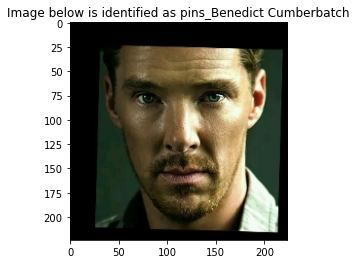

In [117]:
predict_sample(benedict_pic)

1/1 [==============================] - 0s 373ms/step
predicted_class : 19


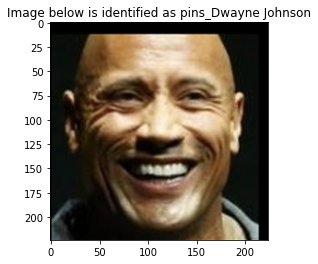

In [118]:
predict_sample(dwayne_pic)

##### The model has correctly predicted the names of the actors present in the 2 given images

# THE END